# Homework 8 (30 points)

name: Yiyang Zhang

email: zhyiyang@umich.edu

This homework assignment took me 15 hours in total to complete. (Please help us to gauge the difficulty of the assignment.)

## Collaboration Disclosure

In the cell below, please list *everyone* with whom you discussed any of the homework problems, excluding only the GSIs and the course instructor. 

If you did not discuss the homework with anyone else, write __"I did not discuss this homework with anyone."__

Even if you discuss questions with other, the code you submit must be only yours. All work is checked with the [MOSS plagiarism detector](https://theory.stanford.edu/~aiken/moss/).

I did not discuss this homework with anyone.

## Submission Instructions
Your homework solutions should be written entirely in this Jupyter notebook file. Once it contains your solutions, you should submit this notebook through Canvas. Before submitting, please make sure make sure __Cells->Run__ executes without errors; errors in your code cause problems for our auto-grader. Thus, even though we may ask you to check for errors in your functions, you should not include in your submission any examples of your functions actually raising those errors.

## Nbgrader

We will be using nbgrader to grade your jupyter notebook. Additional tests will be used at grading time, you are encouraged to read the problem carefully and verify your code covers all appropriate cases.

**Be careful:** If a jupyter notebook cell takes longer than **120 seconds** to run, the autograder will not grade it and you will receive zero credit for that question.

## Error checking

You do not need to do error checking (raising errors, etc.) in your code unless we explicitly ask you to so in a problem.

## Coding style
Please follow the [PEP8 guidelines](https://www.python.org/dev/peps/pep-0008/). The `pycodestyle_magic` package will remind you if you are not. To install it, run
```
pip install flake8 pycodestyle_magic
```
Once it is installed the following two Jupyter directives will enable syntax checking:

In [1]:
%load_ext pycodestyle_magic
%flake8_on --ignore E266 --max_line_length 99

In [2]:
%matplotlib inline
import math
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
sns.set()

## Prefix

In this homework, you are encouraged to use any functions from the libraries numpy, scipy, pandas, seaborn, and sklearn in your solutions unless explicitly told not to.

## Part 1: Introduction to Data Loading, Merging, and Cleaning (3 points)

Data science is one of quickest evolving disciplines in industry at the moment. Many people have the idea that data science is exclusively running models and making predictions; unfortunately, it is not that simple. In this exercise you will perform some data loading, merging, and cleaning so that your dataframes are ready for statistical exploration.

**Data Loading (1 point)** 

Included in the folder with this week's homework is the folder *uber-tlc-foil-response*, which contains all the files with the data you will need to complete this assignment. PLEASE DO NOT MOVE THIS FOLDER TO A DIFFERENT LOCATION THAN WHERE YOU SUBMIT YOUR HOMEWORK. Doing this will break our solutions and will result in points lost. 

Read in __taxi-zone-lookup.csv__ located inside the *uber-trip-data* folder and call the dataframe `taxi_zone_df`. Additionally you will need the "Trips Per Day" and "Trips Per Hour and Weekday" sheets from __Aggregate FHV Data.xls__. 
Please read in those sheets and call the dataframes `tpd_df` and `tph_df`, respectively. Additionally, DO NOT do any data cleaning or merging until asked to.

__Note:__ You may need to install the library `xlrd` to be able to use the `read_excel` function in `pandas`

In [3]:
# YOUR CODE HERE
# Begin answer
taxi_zone_df = pd.read_csv("uber-tlc-foil-response/uber-trip-data/taxi-zone-lookup.csv")
tpd_df = pd.read_excel("uber-tlc-foil-response/Aggregate FHV Data.xls", sheet_name="Trips Per Day")
tph_df = pd.read_excel("uber-tlc-foil-response/Aggregate FHV Data.xls",
                       sheet_name="Trips Per Hour and Weekday")
# End Answer

In [4]:
assert taxi_zone_df.shape == (265, 3)
assert tpd_df.shape == (92, 13)
assert tph_df.shape == (169, 5)

**Data Merging (1 point)**
   
   1. In the *uber-trip-data* folder, you will see csv files containing uber trip data from April 14 to September 14. Please read in each of these csv files. You may choose whatever variable names you want for them. Then, concatenate these data sets. The resulting data set should contain all of the observations and should have the same column names as the ones provided in each individual monthly csv file. Call the result of this concatenation `uber_2014_df`.
    
    
   2. In the *uber-trip-data* folder, you will see a folder called *uber-raw-janjune-15*. Within it is a csv file containing information about Uber trips taken in the first six months of 2015. Read this file in and perform an inner join of this data set with `taxi_zone_df` based on `LocationID`. Recall that an inner join is a merge that only keeps the keys (in this case Location IDs) that appear in both data sets. Call the result of this merge `uber_2015_df`.

In [5]:
# YOUR CODE HERE
# Begin Answer
urd_apr = pd.read_csv("uber-tlc-foil-response/uber-trip-data/uber-raw-data-apr14.csv")
urd_may = pd.read_csv("uber-tlc-foil-response/uber-trip-data/uber-raw-data-may14.csv")
urd_jun = pd.read_csv("uber-tlc-foil-response/uber-trip-data/uber-raw-data-jun14.csv")
urd_jul = pd.read_csv("uber-tlc-foil-response/uber-trip-data/uber-raw-data-jul14.csv")
urd_aug = pd.read_csv("uber-tlc-foil-response/uber-trip-data/uber-raw-data-aug14.csv")
urd_sep = pd.read_csv("uber-tlc-foil-response/uber-trip-data/uber-raw-data-sep14.csv")
uber_2014_df = pd.concat([urd_apr, urd_may, urd_jun, urd_jul, urd_aug, urd_sep])
uber_2015_jj15 = pd.read_csv("uber-tlc-foil-response/uber-trip-data/uber-raw-janjune-15/\
uber-raw-data-janjune-15.csv")
uber_2015_df = pd.merge(uber_2015_jj15, taxi_zone_df, how="inner", on="LocationID")
# End Answer

In [6]:
assert uber_2014_df.shape == (4534327, 4)
assert uber_2015_df.shape == (1048575, 6)

**Data Cleaning (1 point)** 

You may have noticed that the `tph_df` dataframe looks kind of funky. This is because the original Excel file had a nested header. Let's fix that! Make the first row (which has the column names we want) the column names of `tph_df`. Make sure that the column names are also deleted from the data set so that the data set contains only observations. Please keep the resulting dataframe named `tph_df`.

After finishing Part 1 you should have five cleaned data sets: `taxi_zone_df`, `tpd_df`, `tph_df`, `uber_2014_df`, and `uber_2015_df`. You will use these data sets next.

In [7]:
# YOUR CODE HERE
# Begin answer
tph_df = pd.read_excel("uber-tlc-foil-response/Aggregate FHV Data.xls",
                       sheet_name="Trips Per Hour and Weekday", header=None)
tph_df = tph_df.drop([0, 1], axis=0)
tph_df.columns = ["Weekday", "Hour", "other 8 bases", "Uber", "Lyft"]
# End answer

In [8]:
assert tph_df.shape == (168, 5)
assert "Unnamed" not in str(tph_df.columns)

## Part 2: Basic Summary Statistics and Fact Checking (3 points)

__(1 point) "As of July 2015, one-third of all Uber rides started in the outer boroughs and Upper Manhattan — a trend that has been increasing since we first came to NYC."__ Let's assume that this statement is true. Let's also assume that Upper Manhattan would be labelled as "Manhattan" in the Borough column. If this were the case, calculate what percentage of all rides started in the outer boroughs. Store the float result in a variable called `outer_borough_ubers`. Outer boroughs are any borough that is not Manhattan (you should include Borough=='Unknown' as an outer borough as well). You should only use the 2015 data frame for this subproblem.

In [9]:
# YOUR CODE HERE
# Begin answer
count = 0
for i in range(len(uber_2015_df["Borough"])):
    if uber_2015_df["Borough"][i] == "Manhattan":
        count += 1
outer_borough_ubers = (len(uber_2015_df["Borough"])-count)/len(uber_2015_df["Borough"])
# End answer

In [10]:
assert outer_borough_ubers < 0.34

__(1 point) "From April to September [of 2014]... Of the 4.4 million Uber rides for which the data shows a pickup location, 22 percent started outside of Manhattan."__ Verify this statement assuming that Manhattan is contained in a rectangular grid of Lat: [40.6997, 40.8784] and Lon: [-74.0114, -73.9278] and that these boundaries are inclusive. This assumption is just for simplicity of coding; in reality, this will make our proportion of non-Manhattan ubers a bit smaller than expected. Store your float answer in the variable `non_manhattan_ubers`.

In [11]:
# YOUR CODE HERE
# Begin answer
uber_2014_df = uber_2014_df.reset_index(drop=True)
count = 0
for i in range(len(uber_2014_df["Lat"])):
    if uber_2014_df["Lat"][i] >= 40.6997 and uber_2014_df["Lat"][i] <= 40.8784 and \
       uber_2014_df["Lon"][i] >= -74.0114 and uber_2014_df["Lon"][i] <= -73.9278:
        count += 1
non_manhattan_ubers = (len(uber_2014_df["Lat"])-count)/len(uber_2014_df["Lat"])
# End answer

In [12]:
assert abs(non_manhattan_ubers - 0.22) < 0.02

__(1 point) "[Uber's] drivers provided 82 percent more rides in September than in April [of 2014]"__. Verify this statement by storing the exact percentage change in the variable `apr_to_sep`.

In [13]:
# YOUR CODE HERE
# Begin answer
count_apl = 0
count_sep = 0
for i in range(len(uber_2014_df["Date/Time"])):
    if uber_2014_df["Date/Time"][i][0] == "4":
        count_apl += 1
    elif uber_2014_df["Date/Time"][i][0] == "9":
        count_sep += 1
apr_to_sep = count_sep/count_apl-1
# End answer

In [14]:
assert abs(apr_to_sep - 0.82) < 0.02

## Part 3: Creating a Summary Statistics Table (4 points)

1. Summary statistics are a great way to understand the spread of data. Write a function called `variable_summary` that takes in a pandas dataframe of numeric variables and returns a pandas dataframe with the following statistics summaries: 

 - __count__ (The count is the number of times the variable has been observed (i.e. the number of observations minus missing values.))
 - __mean__ $$ \frac{1}{n}\sum_{i=1}^{n}x_{i} $$
 - __std__ (The unbiased standard deviation. Note: `np.var` returns the value expressed below but with n instead of n-1 in the denominator. Make sure to correct for that if you choose to use that function. __Hint:__ You may find the count useful in this calculation.) $$ \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}} $$
 - __min__ (The lowest valued observation.)
 - __25%__ (The 25th percentile or lower quantile).
 - __50%__ (The 50th percentile or median).
 - __75%__ (The 25th percentile or upper quantile).
 - __max__ (The highest valued observation.)
 
   The row index values of the pandas dataframe you return should be replaced with the words in bold; the column names should be the variable names. Round all of your values to 4 decimal places. If you implemented this correctly, your function should behave identically to the `pd.Dataframe.describe` function except for the rounding. You may use the `pd.Dataframe.describe` function to check your work but are prohibited from using it as your solution. Solutions that directly use the describe function will receive no credit. <b> This question is graded all or nothing. </b> __Hint__: The numpy library, the `pd.Dataframe.index` method, and the `pd.Dataframe.astype` method might prove useful for this question.

In [15]:
# Define a function I will use below
def status(x):
    return pd.Series([x.count(), x.mean(), x.std(), x.min(), x.quantile(.25),
                      x.median(), x.quantile(.75), x.max()],
                     index=["count", "mean", "std", "min", "25%", "50%", "75%", "max"])


def variable_summary(data):
    # YOUR CODE HERE
    # Begin answer
    summary = data.apply(status)
    return round(summary, 4)
    # End answer

In [16]:
data = uber_2014_df[["Lat", "Lon"]]
assert all(variable_summary(data) == round(data.describe(), 4))

## Part 4: Introduction to Seaborn Plots: Advanced Fact Checking (7 points)

According to the article *Uber Is Serving New York’s Outer Boroughs More Than Taxis Are*, "Uber is busiest between 5 and 6 p.m." Additionally, the authors claim that "Uber does the least business on Sundays." In this section, we will create some helpful visualizations that will help confirm (or raise doubt on) the claims.

<b> (1 point) </b>  Create a bar chart using Seaborn that plots the average number of trips taken at each time of day across every day of the week. This means your bar chart should have 24 different bars each representing a different hour of the day. __Note:__ By default, the chart will have error bars. Feel free to leave them in (or remove them if you like the challenge) for now. You will clean up this chart in the next problem.

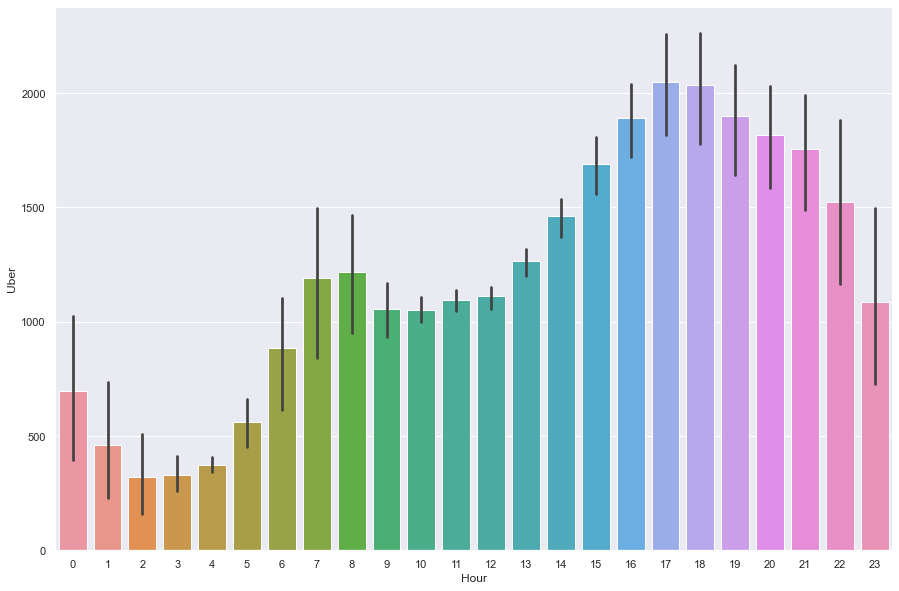

In [17]:
# YOUR CODE HERE
# Begin answer
tph_df = tph_df.reset_index(drop=True)
tph_df["Uber"] = pd.to_numeric(tph_df["Uber"])
plt.figure(figsize=(15, 10))
sns.barplot(x=tph_df["Hour"], y=tph_df["Uber"], data=tph_df)
plt.show()
# End answer

2. <b> (3 points) </b> The last bar chart is helpful in analyzing trends hour by hour. However, we can make some additions that make the graph neater and more detailed. Please make the following changes:


  1. Add caps to the confidence interval lines to make the confidence intervals more readable. 
  2. Color code the bars so that they correspond to the time of day as follows:
     1. 12am-6am (0:00-6:00) (Graveyard Hours): Grey  
     2. 6am-12pm (6:00-12:00) (Morning Hours): Yellow  
     3. 12pm-6pm (12:00-18:00) (Afternoon Hours): Green  
     4. 6pm-12am (18:00-0:00) (Evening Hours): Blue
  3. Add a legend for the colors/labels you specified in 2A-D
  4. Set the title of the graph to "Uber Rides Throughout the Day".
  5. Set the y-axis label to be "Average Number of Uber Rides".
  6. Make the color of the error bar black.
  7. Change the transparency of the bar (parameter `alpha`) to 75% so that the confidence interval bars are more visible.

<ipython-input-18-d547792cc58c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tph_df_l["label"][i] = "12am-6am"
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-18-d547792cc58c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tph_df_l["label"][i] = "6am-12pm"
<ipython-input-18-d547792cc58c>:13: SettingWithCopyWarning: 

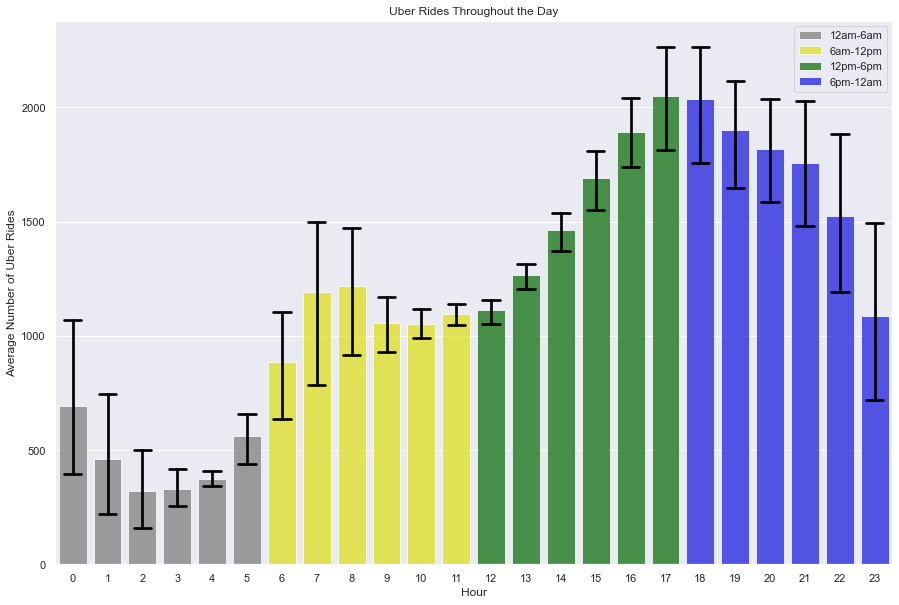

In [18]:
# YOUR CODE HERE
# Begin answer
plt.figure(figsize=(15, 10))
labels = ["grey", "Yellow", "Green", "Blue"]
tph_df_l = tph_df.copy()
tph_df_l["label"] = 0
for i in range(len(tph_df["Hour"])):
    if tph_df_l["Hour"][i] in range(0, 6):
        tph_df_l["label"][i] = "12am-6am"
    elif tph_df_l["Hour"][i] in range(6, 12):
        tph_df_l["label"][i] = "6am-12pm"
    elif tph_df_l["Hour"][i] in range(12, 18):
        tph_df_l["label"][i] = "12pm-6pm"
    else:
        tph_df_l["label"][i] = "6pm-12am"
barplt = sns.barplot(x=tph_df_l["Hour"], y=tph_df_l["Uber"], data=tph_df_l, palette=labels,
                     alpha=0.75, errcolor="0", capsize=0.5, hue='label', dodge=False)
barplt.set_ylabel("Average Number of Uber Rides")
barplt.set_title("Uber Rides Throughout the Day")
plt.legend()
plt.show()
# End answer

3. <b>(3 points)</b> Create a violin plot in that showcases the spread of the number of uber trips taken by weekday. You will want to use `tph_df` to do this task. Start by mapping the numbers in the "Weekday" variable of `tph_df` to their word representations where 1 is Sunday, 2 is Monday,..., 7 is Saturday. Then, plot the violin plot using the data provided by `tph_df` with a muted color palette. Give it a title and make that title and the axes titles more visible. You will be graded on the accuracy and visual readability of the plot. The readability plot means the title and axes are readable and are sensible labels for the data in question. __Hint:__ You may want to increase the figure size for this question.

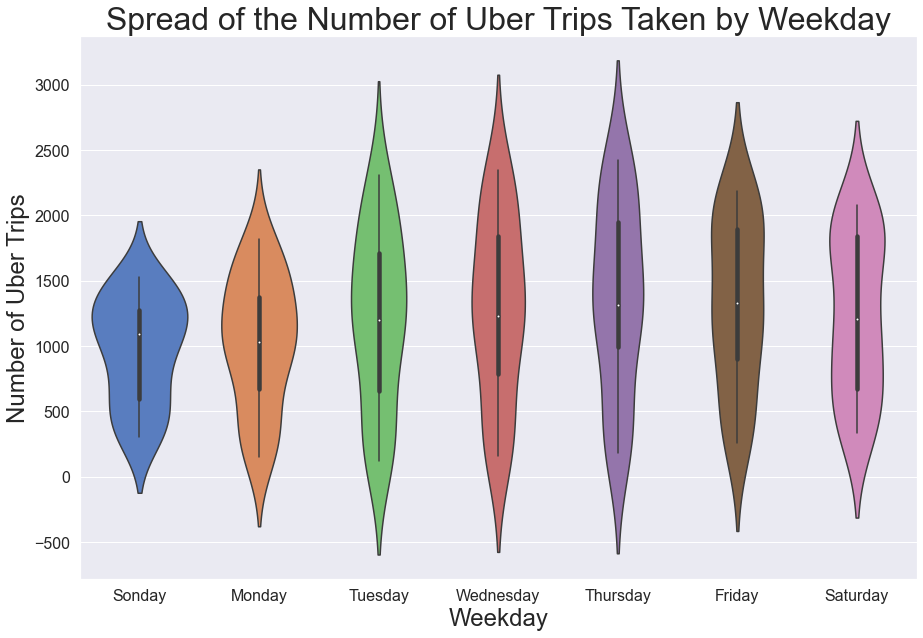

In [19]:
# YOUR CODE HERE
# Begin answer
tph_df["Weekday"] = tph_df["Weekday"].map({1: "Sonday",
                                           2: "Monday",
                                           3: "Tuesday",
                                           4: "Wednesday",
                                           5: "Thursday",
                                           6: "Friday",
                                           7: "Saturday"})
plt.figure(figsize=(15, 10))
violion = sns.violinplot(x=tph_df["Weekday"], y=tph_df["Uber"], errors='coerce', palette="muted")
violion.set_xlabel("Weekday", fontsize="24")
violion.set_ylabel("Number of Uber Trips", fontsize="24")
violion.tick_params(axis="y", labelsize=16)
violion.tick_params(axis="x", labelsize=16)
violion.set_title("Spread of the Number of Uber Trips Taken by Weekday", fontsize='32')
plt.show()
# End answer

## Part 5: Hypothesis Testing Based on Data (5 points)

In this part, you will be using the data you have to answer some questions via hypothesis tests.

Write a function called `higher_prop_uber_test` that takes in two lists of "days" `early_days` and `later_days` and a float `sig_level`. The two sets are constructed such that all of the days in `later days` will be later than the days in `early_days`; the test cases will follow this structure, so you do not need to ensure this is true. The elements of the two lists are row indices in the `tpd_df` data set. The `tpd_df` is by default in chronological order, but if you changed the order before this problem make sure you revert it back to chronological order. 

`higher_prop_uber_test` should run an unpooled 2-sample proportion upper-tailed test (https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Tests_for_Two_Proportions.pdf) that tests if the proportion of ubers described in `later_days` is statistically significantly greater than the proportion of ubers described in `early_days` at the specified significance level `sig_level`. Regardless of the sample size, you can use the normal distribution to find the critical value. The proportion of ubers can be calculated as follows: $$p = \frac{Uber}{Uber + Yellow Cab + Green Cab} $$ The hypothesis test looks like this: $$ H_{0}: p_{later} - p_{early} \leq 0 \\ H_{1}: p_{later} - p_{early} > 0 $$ The function should return the string __"Reject Null"__ if it rejects the null hypothesis and __"Fails to Reject Null"__ if it doesn't. Please make sure your function returns these strings exactly as written. Typos will receive no credit.

**Note:** We would like to take days at random from subsets but because this is autograded, we are putting in the additional feature that it should work with any set of days provided by `early_days` and `later_days` that satisfy the constraint mentioned above.

In [20]:
from scipy.stats import norm


def higher_prop_uber_test(early_days, later_days, sig_level):
    # YOUR CODE HERE
    # Begin answer
    early_data = tpd_df.iloc[early_days]
    later_data = tpd_df.iloc[later_days]
    p_early = early_data["Uber"].sum()/(early_data["Uber"].sum() +
                                        early_data["Yellow Taxis"].sum() +
                                        early_data["Green Taxis"].sum())
    p_later = later_data["Uber"].sum()/(later_data["Uber"].sum() +
                                        later_data["Yellow Taxis"].sum() +
                                        later_data["Green Taxis"].sum())
    p_value = norm.ppf(1-sig_level)
    sigma = np.sqrt(p_early*(1-p_early)/(early_data["Uber"].sum() +
                    early_data["Yellow Taxis"].sum()+early_data["Green Taxis"].sum()) +
                    p_later*(1-p_later)/(later_data["Uber"].sum() +
                    later_data["Yellow Taxis"].sum()+later_data["Green Taxis"].sum()))
    z = (p_later-p_early)/sigma
    if p_value < z:
        return "Reject Null"
    else:
        return "Fails to Reject Null"
    # End answer

In [21]:
# Tests if the second 2 weeks of September had a statisitically
# significant higher proportion of Uber trips than its first 2 weeks.
assert higher_prop_uber_test(range(62, 77), range(77, 92), 0.05) == "Reject Null"

In [22]:
# Tests if the second 45 days of measurements had a statisitically
# significant higher proportion of Uber trips than the first 45 days.
assert higher_prop_uber_test(range(1, 45), range(46, 90), 0.05) == "Reject Null"

In [23]:
# This is a case of high variability since the proportion of Ubers
# can change day to day. This is a case that should fail to reject.
assert higher_prop_uber_test([3], [4], 0.05) == "Fails to Reject Null"

In [24]:
# Silly cases for autograding purposes
assert higher_prop_uber_test(range(1, 20, 3), range(71, 92, 7), 0.05) == "Reject Null"

In [25]:
# Silly cases for autograding purposes
assert higher_prop_uber_test([2, 3, 5, 7, 11], [67, 71, 73], 0.05) == "Reject Null"

## Part 6: Clustering (8 points)

Clustering is an incredibly powerful tool in data science that allows us to group large amount of information into categories. These categories can prove to have intuitive interpretations or can reveal something interesting about the data that was previously unknown. For this exercise we will use a clustering algorithm called the Gaussian Mixture Model Cluster. While the theory of this clustering algorithm is quite dense, the synopsis is that k different Gaussian distributions are learned that represent k different clusters. Using this information, we can probabilistically determine which cluster a data point belongs to by simply assigning it to Gaussian distribution $j$ which maximizes the probability of $X_i$ being in that cluster. More information can be found here: https://medium.com/clustering-with-gaussian-mixture-model/clustering-with-gaussian-mixture-model-c695b6cd60da.

That being said, let's get started!

**(1 point)** For this question, we are only going to be interested in Ubers that started within NYC. Create a new data frame called `nyc` that limits the observations found in `uber_2014_df` to ones found within $[40.5, 40.91]$ latitude and $[-74.25, -73.68]$ longitude.

In [26]:
# YOUR CODE HERE
# Begin answer
nyc = uber_2014_df.copy()
indexlist = []
for i in range(len(nyc)):
    if nyc["Lat"][i] > 40.91 or nyc["Lat"][i] < 40.5 or\
       nyc["Lon"][i] > -73.68 or nyc["Lon"][i] < -74.25:
        indexlist.append(i)
nyc = nyc.drop(index=indexlist)
# End answer

In [27]:
assert nyc.shape == (4502775, 4)

**(3 points)** Write a function called `GMM_Cluster` that takes 2 arguments: a data set of only Latitude (`Lat`) and Longitude (`Lon`) values, and an integer `K` representing the number of clusters. The function should return the original data frame with an additional column called "Cluster" representing the cluster each observation has been assigned to. 

   __Hint__: You may find the class `sklearn.mixture.GaussianMixture` and methods `fit` and `fit_predict` incredibly useful. This will automatically perform Gaussian Mixture Model Clustering for you, but implementing it from scratch is perfectly acceptable if you're up for the challenge.

In [28]:
from sklearn.mixture import GaussianMixture


def GMM_Cluster(data, K):
    # YOUR CODE HERE
    # Begin answer
    gmm = GaussianMixture(n_components=K, random_state=0)
    gmm.fit(data)
    data["Cluster"] = gmm.predict(data)
    return data
    # End answer

In [29]:
assert list(GMM_Cluster(nyc.iloc[1:3][["Lat", "Lon"]], 1).columns) == ['Lat', 'Lon', 'Cluster']

Sometimes, our different variables are on wildly different locations and scales and we want to standardize our data in order to make better sense of our conclusions. Given our only numeric variables in `uber_2014_df` are "Lat" and "Lon", this will probably not be the case, but it is still good to know how to do.

<b> (3 points) </b> Write a function called `standardized_GMM_Cluster` which takes in the same inputs and returns the same output but runs the GMM_Cluster algorithm on standardized data. You may find the class
```
sklearn.preprocessing.StandardScaler
```
useful here (it's good practice to use functions written by a library like sklearn even to do 'simple' operations).  __Hint:__ You may also use the function you developed in the previous question.

In [30]:
from sklearn.preprocessing import StandardScaler


def standardized_GMM_Cluster(data, K):
    # YOUR CODE HERE
    # Begin answer
    scaler = StandardScaler()
    scaler.fit(data)
    data1 = scaler.transform(data)
    gmm = GaussianMixture(n_components=K, random_state=0)
    gmm.fit(data1)
    data["Cluster"] = gmm.predict(data1)
    return data
    # End answer

In [31]:
expected_columns = list(standardized_GMM_Cluster(nyc.iloc[1:3][["Lat", "Lon"]], 1).columns)
assert expected_columns == ['Lat', 'Lon', 'Cluster']

<b> (1 point) </b> The code below plots a rough sketch of the boundary of Manhattan. This is not a coincidence. Write some additional code within the cell that runs `GMM_Cluster` on `K = 2` and plots the result. The result should include "Lat" and "Lon" on the appropriate axes (see a map if you need the right mapping). Additionally, the color of each point should be the cluster it belongs to. For faster runtime, feel free to just plot any random 100,000 observations (I did ones with indices in `range(0, 4000000, 40)`). You should see that from the geographical coordinates alone, `GMM_Cluster` with `K = 2` was able to cluster trips that happened in Manhattan, particularly the lower half of it, separately of all other Uber pickup locations. 

<ipython-input-28-50ae6f44820f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cluster"] = gmm.predict(data)


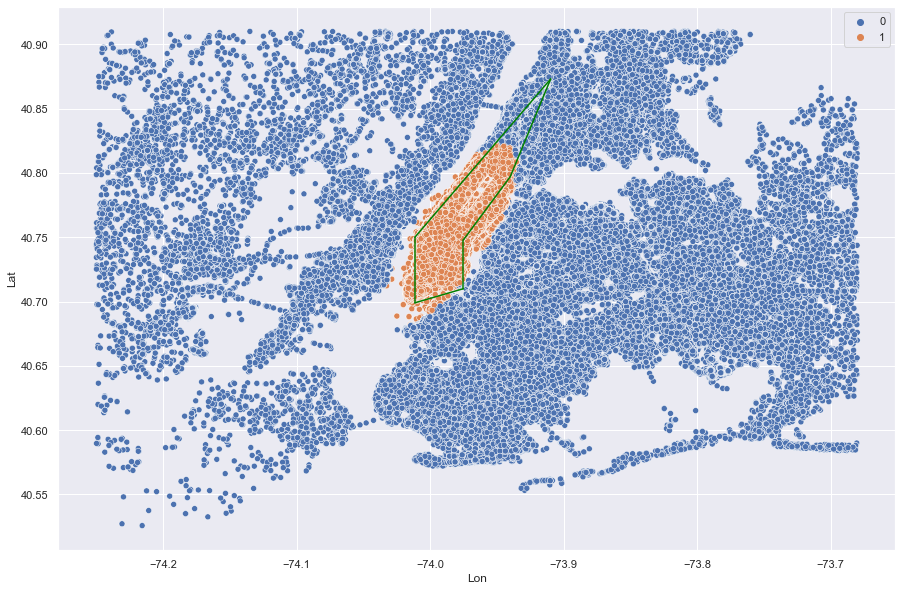

In [32]:
plt.figure(figsize=(15, 10))
x = [-74.0114, -73.975, -73.975, -73.94, -73.9097, -74.0114]
y = [40.699, 40.71, 40.748, 40.797, 40.873, 40.75]
for i in range(len(x)):
    if i != len(x)-1:
        plt.plot([x[i], x[i+1]], [y[i], y[i+1]], c="green")
    else:
        plt.plot([x[i], x[0]], [y[i], y[0]], c="green")
plt.xlabel("Lon")
plt.ylabel("Lat")
# YOUR CODE HERE
# Begin answer
gmmdata = GMM_Cluster(nyc[["Lat", "Lon"]], 2)
gmmdata.head()
sns.scatterplot(x="Lon", y="Lat", data=gmmdata, hue="Cluster")
plt.legend()
plt.show()
# End answer

This clustering exercise was a minimal example. In practice, these clustering algorithms improve with certain data conditions and more variables to work with.

<b>(Optional)</b> In `uber_2014_df` we could actually create another numerical variable out of the date and time variable. In particular, it is reasonable to assume that as the months go by, the destinations in NYC don't really change, but at different hours of the day, Uber pickup locations would certainly vary. Write some code that creates a variable called "Time_Mins" that represents $hour*60+min$ of each pickup time. For example, if the Date/Time value of an observation say that a pickup happened at 22:58:00 (10:58PM), then the resulting Time_Mins value would be $22*60+58=1378$. Then, run `standardized_GMM_Cluster` with K = 2,3,5, and 7. Finally, plot all 4 of these graphs in a 2x2 grid of plots that have the same axis titles and Manhattan outline. The axes should be the UNSTANDARDIZED values of Lat and Lon, each plot should have an appropriate title ("K = 5" is fine for example), and the color of the points should be their associated cluster.